In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scanpy as sc
import scirpy as ir
import scanpy as sc
import muon as mu
import os

from datetime import datetime
date = datetime.today().strftime('%Y-%m-%d')
print (date)

path = './'

c:\Users\perry\anaconda3\envs\GEX2023\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\perry\anaconda3\envs\GEX2023\lib\site-packages\numba\core\cpu.py:99: UserWarning: Numba extension module 'sparse._numba_extension' failed to load due to 'ModuleNotFoundError(No module named 'numba.targets')'.
  numba.core.entrypoints.init_all()


2024-05-08


### Analysis of single cell VDJ-sequencing data

In [2]:
order = ['U-mRNA', 'm1Ψ-mRNA', 'GPC', 'Empty LNP']
colordict = {'U-mRNA':'cornflowerblue', 'm1Ψ-mRNA':'red', 'GPC':'lightgreen', 'Empty LNP':'black'}

In [3]:
# I think it would be better to align each sample as I load it, then concatenate all of them.

def load_vdj(folder):

    # Load in Cell Ranger outputs
    vdj_output = pd.read_csv((path +folder + '/' + [f for f in os.listdir(path + folder) if 'paired' in (f)][0]), index_col=0)
    vdj_output['Repeat'] = folder

    vdj_output.index = vdj_output.index + '-1-' + (folder)[0] + (folder)[-1]

    print('vdj shape:')
    print(vdj_output.shape)

    return vdj_output

Uridine

In [4]:
u1_vdj = load_vdj('uridine1')
u2_vdj = load_vdj('uridine2')
u3_vdj = load_vdj('uridine3')
u4_vdj = load_vdj('uridine4')

# Concatenate the samples
u_vdj = pd.concat([u1_vdj, u2_vdj, u3_vdj, u4_vdj])

vdj shape:
(2766, 63)
vdj shape:
(4322, 63)
vdj shape:
(5038, 63)
vdj shape:
(3912, 63)


Pseudouridine

In [5]:
p1_vdj = load_vdj('pseudo1')
p2_vdj = load_vdj('pseudo2')
p3_vdj = load_vdj('pseudo3')
p4_vdj = load_vdj('pseudo4')

# Concatenate the samples, 
p_vdj = pd.concat([p1_vdj, p2_vdj, p3_vdj, p4_vdj])

vdj shape:
(4493, 63)
vdj shape:
(4584, 63)
vdj shape:
(4397, 63)
vdj shape:
(4893, 63)


Empty Nano

In [6]:
n1_vdj = load_vdj('nano1')
n2_vdj = load_vdj('nano2')
n3_vdj = load_vdj('nano3')
n4_vdj = load_vdj('nano4')

# Concatenate the samples
n_vdj = pd.concat([n1_vdj, n2_vdj, n3_vdj, n4_vdj])

vdj shape:
(993, 63)
vdj shape:
(611, 63)
vdj shape:
(906, 63)
vdj shape:
(1254, 63)


GPCAg

In [7]:
g1_vdj = load_vdj('GPCAg-1')
g2_vdj = load_vdj('GPCAg-2')
g3_vdj = load_vdj('GPCAg-3')
g4_vdj = load_vdj('GPCAg-4')

# Concatenate the samples
g_vdj = pd.concat([g1_vdj, g2_vdj, g3_vdj, g4_vdj])

vdj shape:
(1865, 63)
vdj shape:
(3439, 63)
vdj shape:
(3741, 63)
vdj shape:
(3701, 63)


### Concatenation

In [8]:
vdj_dfs = [p_vdj,  u_vdj, g_vdj, n_vdj] 
vdj_df = pd.concat(vdj_dfs)

In [9]:
vdj_df['Sample'] = [i.split('-')[2][0] for i in vdj_df.index]
vdj_df['Sample']= vdj_df['Sample'].map({'u':'U-mRNA', 'p':'m1Ψ-mRNA', 'G':'GPC', 'n':'Empty LNP'})

In [10]:
vgene_df = pd.DataFrame(vdj_df.groupby('Sample')['V_CALL.H'].value_counts())
vgene_df.columns = ['Count']
vgene_df['VH_gene'] = vgene_df.index.get_level_values(0)
vgene_df.index = vgene_df.index.droplevel(0)
vgene_df = vgene_df.pivot(columns='VH_gene')
vgene_df.columns = vgene_df.columns.droplevel(0)

vgene_df.index = [i.replace('Musmus ', '') for i in vgene_df.index]

# Normalize by number of condition cells
vgene_df= vgene_df.divide(vdj_df['Sample'].value_counts(), axis=1) * 100

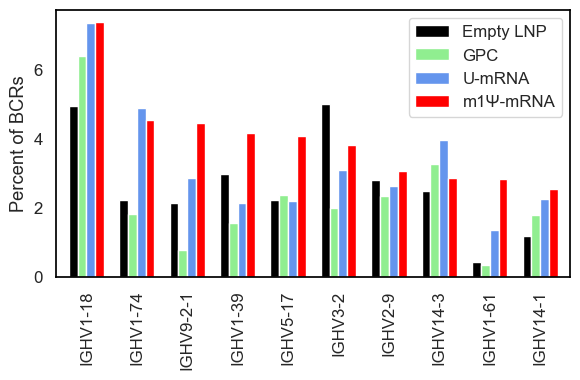

In [12]:
sns.set(rc = {'figure.figsize':(6,4)}, font_scale=1.1, palette='tab10', font="Arial" )
sns.set_style("white", { "ytick.major.size": 0.1, "ytick.minor.size": 0.05, 'grid.linestyle': '--', 'axes.edgecolor': 'black', 'axes.spines.right': True, 'axes.spines.top': True})

plot_df = vgene_df.sort_values(by='m1Ψ-mRNA', ascending=False).head(10)
plot_df = plot_df[['Empty LNP','U-mRNA', 'm1Ψ-mRNA', 'GPC']]

vgene_df.sort_values(by='m1Ψ-mRNA', ascending=False).head(10).plot.bar(width=0.7, color=colordict)
plt.ylabel('Percent of BCRs')

plt.tight_layout()

# plt.savefig('vh_gene_usage.svg')

In [29]:
vgene_df = pd.DataFrame(vdj_df.groupby('Sample')['V_CALL.L'].value_counts())
vgene_df.columns = ['Count']
vgene_df['VL_gene'] = vgene_df.index.get_level_values(0)
vgene_df.index = vgene_df.index.droplevel(0)
vgene_df = vgene_df.pivot(columns='VL_gene')
vgene_df.columns = vgene_df.columns.droplevel(0)

vgene_df.index = [i.replace('Musmus ', '') for i in vgene_df.index]

# Normalize by number of condition cells
vgene_df= vgene_df.divide(vdj_df['Sample'].value_counts(), axis=1) * 100

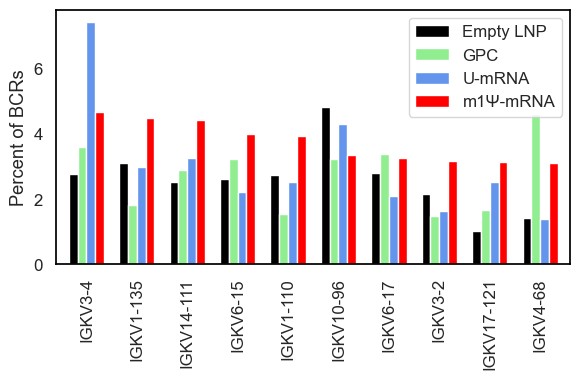

In [30]:
# sns.set(rc = {'figure.figsize':(6,4)}, font_scale=1.1, palette='tab10')
# sns.set_style("white", { "ytick.major.size": 0.1, "ytick.minor.size": 0.05, 'grid.linestyle': '--', 'axes.edgecolor': 'black', 'axes.spines.right': True, 'axes.spines.top': True})


plot_df = vgene_df.sort_values(by='m1Ψ-mRNA', ascending=False).head(10)
plot_df = plot_df[['Empty LNP','U-mRNA', 'm1Ψ-mRNA', 'GPC']]

vgene_df.sort_values(by='m1Ψ-mRNA', ascending=False).head(10).plot.bar(width=0.7, color=colordict)
plt.ylabel('Percent of BCRs')

plt.tight_layout()

# plt.savefig('vl_gene_usage.svg')

### Integrating VDJ with Scirpy

In [31]:
concat_adata = sc.read_h5ad('concat_adata.h5ad')

#### Loading VDJ data

In [ ]:
import dandelion as ddl

In [ ]:
pseudo1_vdj = ddl.read_10x_vdj('./VDJ_annotations/pseudo1/filtered_contig_annotations.csv')
pseudo1_vdj.data.repeat = 'pseudo1'
pseudo1_vdj.data.Sample = 'm1Ψ-mRNA'

pseudo2_vdj = ddl.read_10x_vdj('./VDJ_annotations/pseudo2/filtered_contig_annotations.csv')
pseudo1_vdj.data.repeat = 'pseudo1'
pseudo1_vdj.data.Sample = 'm1Ψ-mRNA'

pseudo3_vdj = ddl.read_10x_vdj('./VDJ_annotations/pseudo3/filtered_contig_annotations.csv')
pseudo1_vdj.data.repeat = 'pseudo1'
pseudo1_vdj.data.Sample = 'm1Ψ-mRNA'

pseudo4_vdj = ddl.read_10x_vdj('./VDJ_annotations/pseudo4/filtered_contig_annotations.csv')
pseudo1_vdj.data.repeat = 'pseudo1'
pseudo1_vdj.data.Sample = 'm1Ψ-mRNA'

pseudo_vdj = ddl.concat([pseudo1_vdj, pseudo2_vdj, pseudo3_vdj, pseudo4_vdj], suffixes=['p1', 'p2','p3', 'p4',])

uridine1_vdj = ddl.read_10x_vdj('./VDJ_annotations/uridine1/filtered_contig_annotations.csv')
uridine2_vdj = ddl.read_10x_vdj('./VDJ_annotations/uridine2/filtered_contig_annotations.csv')
uridine3_vdj = ddl.read_10x_vdj('./VDJ_annotations/uridine3/filtered_contig_annotations.csv')
uridine4_vdj = ddl.read_10x_vdj('./VDJ_annotations/uridine4/filtered_contig_annotations.csv')

uridine_vdj = ddl.concat([uridine1_vdj, uridine2_vdj, uridine3_vdj, uridine4_vdj], suffixes=['u1', 'u2','u3', 'u4',])

gpcag1_vdj = ddl.read_10x_vdj('./VDJ_annotations/gpca1/filtered_contig_annotations.csv')
gpcag2_vdj = ddl.read_10x_vdj('./VDJ_annotations/gpca2/filtered_contig_annotations.csv')
gpcag3_vdj = ddl.read_10x_vdj('./VDJ_annotations/gpca3/filtered_contig_annotations.csv')
gpcag4_vdj = ddl.read_10x_vdj('./VDJ_annotations/gpca4/filtered_contig_annotations.csv')

gpcag_vdj = ddl.concat([gpcag1_vdj, gpcag2_vdj, gpcag3_vdj, gpcag4_vdj], suffixes=['g1', 'g2','g3', 'g4',])

nano1_vdj = ddl.read_10x_vdj('./VDJ_annotations/nano1/filtered_contig_annotations.csv')
nano2_vdj = ddl.read_10x_vdj('./VDJ_annotations/nano2/filtered_contig_annotations.csv')
nano3_vdj = ddl.read_10x_vdj('./VDJ_annotations/nano3/filtered_contig_annotations.csv')
nano4_vdj = ddl.read_10x_vdj('./VDJ_annotations/nano4/filtered_contig_annotations.csv')

nano_vdj = ddl.concat([nano1_vdj, nano2_vdj, nano3_vdj, nano4_vdj], suffixes=['n1', 'n2','n3', 'n4',])

In [18]:
vdj_concat = ddl.concat([pseudo_vdj, uridine_vdj, gpcag_vdj, nano_vdj], suffixes=['P', 'U', 'G', 'N'])

In [19]:
vdj_concat.data['Repeat'] = [i.split('-')[2] for i in vdj_concat.data.sequence_id]

In [108]:
# vdj_concat.write_pkl(('vdj_concat_dandelion_23-11-01.pickle'))

In [109]:
vdj_concat

Dandelion class object with n_obs = 58122 and n_contigs = 117034
    data: 'cell_id', 'is_cell_10x', 'sequence_id', 'high_confidence_10x', 'sequence_length_10x', 'locus', 'v_call', 'd_call', 'j_call', 'c_call', 'complete_vdj', 'productive', 'fwr1_aa', 'fwr1', 'cdr1_aa', 'cdr1', 'fwr2_aa', 'fwr2', 'cdr2_aa', 'cdr2', 'fwr3_aa', 'fwr3', 'junction_aa', 'junction', 'fwr4_aa', 'fwr4', 'consensus_count', 'duplicate_count', 'clone_id', 'raw_consensus_id_10x', 'exact_subclonotype_id_10x', 'rearrangement_status', 'Repeat'
    metadata: 'clone_id', 'clone_id_by_size', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_B_VDJ', 'd_call_B_VDJ', 'j_call_B_VDJ', 'v_call_B_VJ', 'j_call_B_VJ', 'c_call_B_VDJ', 'c_call_B_VJ', 'productive_B_VDJ', 'productive_B_VJ', 'duplicate_count_B_VDJ', 'duplicate_count_B_VJ', 'v_call_VDJ_main

In [20]:
vdj_concat.data['cell_id'] = vdj_concat.data['cell_id'] + '-' + vdj_concat.data['Repeat']

In [119]:
len(np.intersect1d(vdj_concat.data['cell_id'].values, concat_adata.obs.index))

42810

In [ ]:
vdj_concat, concat_adata = ddl.pp.check_contigs(vdj_concat, concat_adata)

In [21]:
ir.pp.ir_dist(mdata, metric='levenshtein', sequence='aa',cutoff=1.2)

100%|██████████| 528/528 [00:46<00:00, 11.31it/s]


In [22]:
ir.tl.define_clonotype_clusters(mdata, sequence="aa", metric="levenshtein", receptor_arms="VDJ", dual_ir="primary_only", same_v_gene = True, resolution = 0.7, key_added='0p7_res_clones')

100%|██████████| 31488/31488 [00:16<00:00, 1955.69it/s]


In [29]:
# mdata.write_h5mu('clonal_mdata_24-03-20.h5mu')
mdata = ir.io.read_h5mu('clonal_mdata_24-03-20.h5mu')

In [6]:
mdata

MuData object with n_obs × n_vars = 60383 × 1466
  2 modalities
    GEX:	42810 x 1466
      obs:	'Isotype', 'Repeat', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'Sample', 'leiden'
      var:	'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
      uns:	'Sample_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts'
      obsp:	'connectivities', 'distances'
    airr:	60383 x 0
      obs:	'Repeat', 'Sample', 'receptor_type', 'receptor_subtype', 'chain_pairing', '0p7_res_clones', '0p7_res_clones_size'
      uns:	'0p7_res_clones', 'chain_indices', 'ir_dist_aa_levenshtein'
      obsm:	'airr', 'chain_indices'

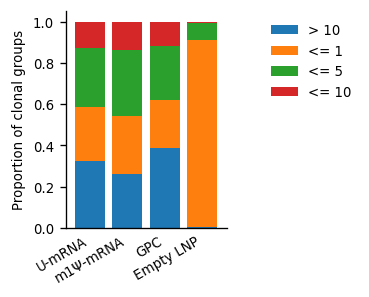

In [54]:
_ = ir.pl.clonal_expansion(
    mdata, target_col="0p7_res_clones", groupby="airr:Sample", breakpoints = (1,5,10),normalize=True, width=0.8) #clip_at=5,

plt.ylabel('Proportion of clonal groups')
# plt.legend(title='Group size')

# _.legend(labels=['>10', '1', '2-5', '6-10', ], title='Clonal group size', bbox_to_anchor=(1,1))
plt.tight_layout()

# plt.savefig('clonal_expansion_barplot_24-03-21.svg')

In [5]:
clone_df = mdata['airr'].obs[['0p7_res_clones', 'Sample']]
clone_df.dropna(inplace=True)

clone_df['Repeat'] = clone_df.index
clone_df['Repeat'] = clone_df['Repeat'].apply(lambda x:x.split('-')[2])

C:\Users\perry\AppData\Local\Temp\ipykernel_25680\245493805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clone_df.dropna(inplace=True)


In [23]:
matrix_df = pd.DataFrame(index = clone_df['Repeat'].unique(), columns = clone_df['Repeat'].unique())

for sample1 in clone_df['Repeat'].unique():
    for sample2 in clone_df['Repeat'].unique():
        matrix_df.loc[sample1, sample2] = len(np.intersect1d(clone_df[clone_df['Repeat'] == sample1]['0p7_res_clones'].unique(), clone_df[clone_df['Repeat'] == sample2]['0p7_res_clones'].unique()))

In [24]:
matrix_df

,p1,p2,p3,p4,u1,u2,u3,u4,g1,g2,g3,g4,n1,n2,n3,n4
p1,1907,116,49,35,21,18,18,10,4,10,17,12,8,2,10,10
p2,116,2071,101,29,25,18,27,16,8,17,18,15,8,5,17,13
p3,49,101,2133,46,25,23,29,14,12,10,22,16,13,6,4,10
p4,35,29,46,2040,25,21,20,13,6,10,16,15,10,4,6,10
u1,21,25,25,25,1300,35,17,10,6,5,9,8,5,3,2,9
u2,18,18,23,21,35,1942,91,22,3,7,5,8,8,4,4,8
u3,18,27,29,20,17,91,2395,116,6,11,11,17,9,2,8,10
u4,10,16,14,13,10,22,116,2057,4,5,6,12,8,3,10,9
g1,4,8,12,6,6,3,6,4,586,37,15,18,1,0,3,2
g2,10,17,10,10,5,7,11,5,37,1245,41,32,5,0,6,9


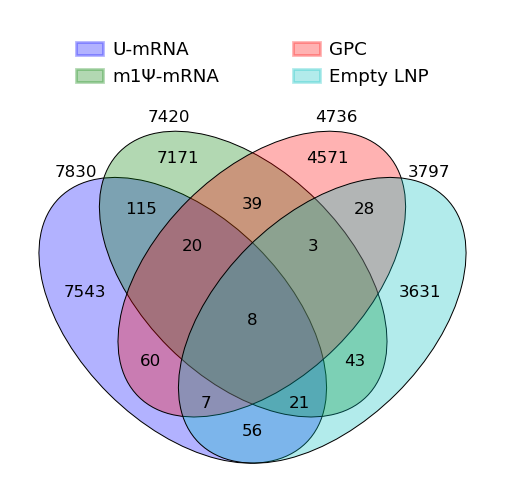

In [14]:
from venny4py.venny4py import *
plt.rcParams.update({'font.size': 16})


grouped = clone_df.groupby('Sample')['0p7_res_clones'].apply(set)

sns.set_palette(['blue', 'red','lightgreen', 'black'])


venny4py(sets=grouped.to_dict(), dpi=600, size=3,  ext='png')